In [1]:
import pandas as pd
import numpy as np
import pylab as plt
import seaborn as sns
import scipy.stats as stats
from statsmodels.stats.outliers_influence import variance_inflation_factor
from scipy.stats import chi2_contingency
from sklearn.preprocessing import LabelEncoder,OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from statsmodels.api import OLS
from statsmodels.stats.stattools import durbin_watson
from sklearn import metrics

In [2]:
import os
os.chdir(r'C:\Users\Vish\Documents\Data\Dataset')
df = pd.read_csv("Insurance.csv")

In [3]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


C:\Users\vish\anaconda3_64\lib\site-packages\seaborn\axisgrid.py:1912: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


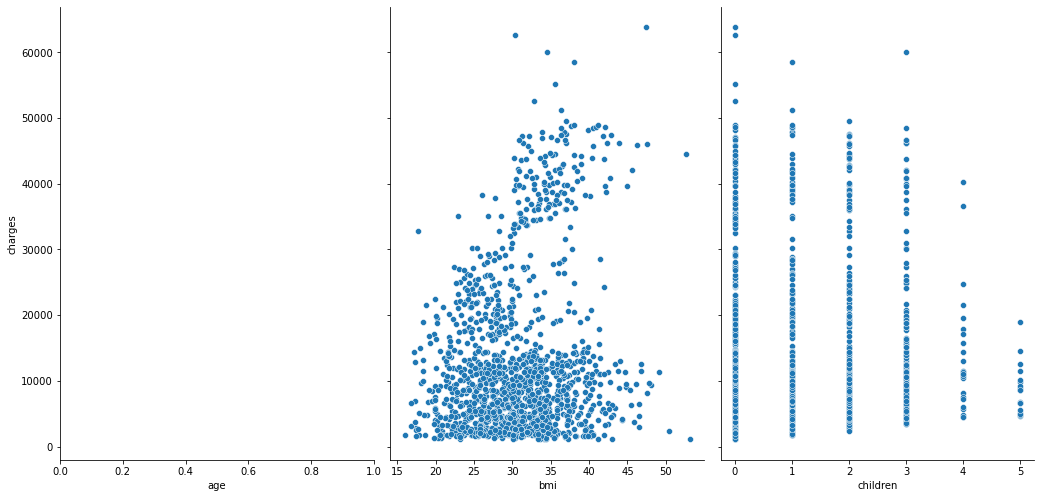

In [4]:
#Checking linearity between input and target variables
sns.pairplot(df, x_vars=['age','bmi','children'], y_vars='charges', size=7, aspect=0.7)

In [5]:
corr_matrix = df.corr()
print(corr_matrix["charges"].sort_values(ascending=False))

charges     1.000000
age         0.299008
bmi         0.198341
children    0.067998
Name: charges, dtype: float64


Skewness is  1.5158796580240388


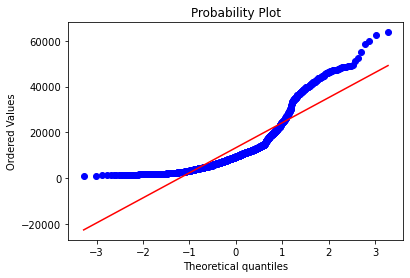

C:\Users\vish\anaconda3_64\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='charges', ylabel='Density'>

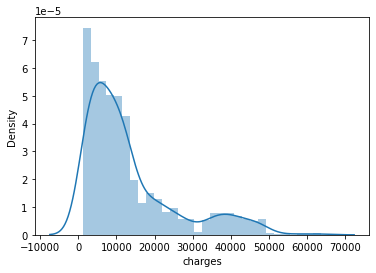

In [6]:
#Checking normal distribution of variables 
# Skewness of the normal distribution is zero.
#To reduce right skewness, take roots or logarithms or reciprocals (roots are weakest). 
#To reduce left skewness, take squares or cubes or higher powers.
print("Skewness is ",df['charges'].skew())
stats.probplot(df['charges'],dist='norm',plot=plt)
plt.show()
sns.distplot(df['charges'])

Skewness is  0.41599590281868765


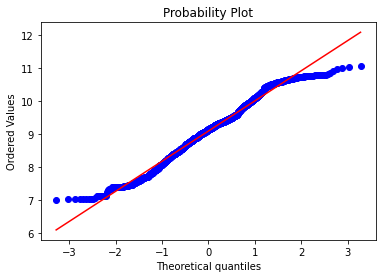

C:\Users\vish\anaconda3_64\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='charges', ylabel='Density'>

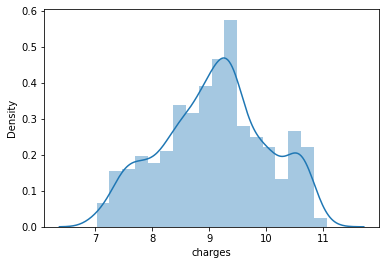

In [7]:
#right skewed data transformation
print("Skewness is ",np.log(df['charges'].skew()))
stats.probplot(np.log(df['charges']),dist='norm',plot=plt)
plt.show()
sns.distplot(np.log(df['charges']))

<AxesSubplot:>

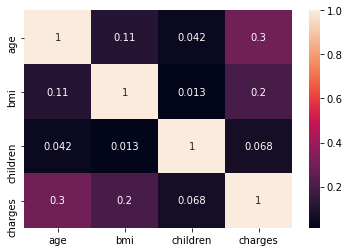

In [8]:
#Check correlation between input and outcome variables
sns.heatmap(df.corr(),annot=True)

In [9]:
df_copy=df.drop(['sex','smoker','region'],axis=1)
vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(df_copy.values, i) for i in range(df_copy.shape[1])]
vif["features"] = df_copy.columns
vif.head()

,VIF Factor,features
0,8.098132,age
1,8.044400,bmi
2,1.800015,children
3,2.473524,charges


In [10]:
chi2_contingency(pd.crosstab(df['sex'],df['smoker']))

(7.39291081459996,
 0.006548143503580696,
 1,
 array([[526.43348281, 135.56651719],
        [537.56651719, 138.43348281]]))

In [11]:
chi2_contingency(pd.crosstab(df['sex'],df['region']))

(0.43513679354327284,
 0.9328921288772233,
 3,
 array([[160.30493274, 160.79970105, 180.09566517, 160.79970105],
        [163.69506726, 164.20029895, 183.90433483, 164.20029895]]))

In [12]:
chi2_contingency(pd.crosstab(df['smoker'],df['region']))

(7.34347776140707,
 0.06171954839170547,
 3,
 array([[257.65022422, 258.44544096, 289.45889387, 258.44544096],
        [ 66.34977578,  66.55455904,  74.54110613,  66.55455904]]))

In [13]:
df.drop(['region'],axis=1,inplace=True)

In [15]:
l1=LabelEncoder()
l2=LabelEncoder()

df['sex']=l1.fit_transform(df['sex'])
df['smoker']=l2.fit_transform(df['smoker'])

In [16]:
df.head()

,age,sex,bmi,children,smoker,charges
0,19,0,27.900,0,1,16884.92400
1,18,1,33.770,1,0,1725.55230
2,28,1,33.000,3,0,4449.46200
3,33,1,22.705,0,0,21984.47061
4,32,1,28.880,0,0,3866.85520


In [18]:
#Splitting the data
X = df.iloc[:,:9]
y = df['charges'] 

In [19]:
#Creating the Training and Test set from data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [20]:
#Model building
#model = LinearRegression())
#fit_intercept:bool, default=True--Whether to calculate the intercept for this model. If set to False, no intercept will be used in calculations
#model = model.fit(X_train, y_train)
#normalize:bool, default=False--This parameter is ignored when fit_intercept is set to False. If True, the regressors X will be normalized before regression by subtracting the mean and dividing by the l2-norm. 
#If you wish to standardize, please use StandardScaler before calling fit on an estimator with normalize=False.
#copy_X:bool, default=True. If True, X will be copied; else, it may be overwritten.
#n_jobs:{int, None}, default=None--The number of jobs to run in parallel
#positive:bool, default=False--When set to True, forces the coefficients to be positive. This option is only supported for dense arrays.
model=OLS(y_train,X_train).fit()

In [21]:
#Predictions
#The predict fuction converts probability values > .5 to 1 else 0
y_pred=model.predict(X_test)

In [23]:
#Model building
print('Mean Absolute Error =',metrics.mean_absolute_error(y_test,y_pred))
print('Mean Squared Error = ',metrics.mean_squared_error(y_test,y_pred))
print('Root Mean Squared Error = ',np.sqrt(metrics.mean_squared_error(y_test,y_pred)))
print('R2 Score = ',metrics.r2_score(y_test,y_pred))
#coeff_df = pd.DataFrame(model.coef_, df.columns, columns=['Coefficient'])  
print(model.summary())

Mean Absolute Error = 5.485248518528518e-12
Mean Squared Error =  4.7765822256408647e-23
Root Mean Squared Error =  6.911282244012948e-12
R2 Score =  1.0
                                 OLS Regression Results                                
Dep. Variable:                charges   R-squared (uncentered):                   1.000
Model:                            OLS   Adj. R-squared (uncentered):              1.000
Method:                 Least Squares   F-statistic:                          9.101e+32
Date:                Fri, 11 Jun 2021   Prob (F-statistic):                        0.00
Time:                        16:33:09   Log-Likelihood:                          22669.
No. Observations:                 936   AIC:                                 -4.533e+04
Df Residuals:                     930   BIC:                                 -4.530e+04
Df Model:                           6                                                  
Covariance Type:            nonrobust                 

C:\Users\vish\anaconda3_64\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='charges'>

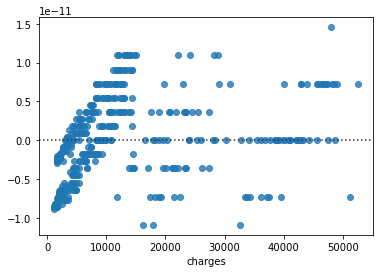

In [24]:
# Homoscedasticity - whether errors have constant variance
sns.residplot(y_test,y_pred)

In [25]:
#Checking autocorrelation of errors
#Durbin watson test
#The DW test statistic is located in the default summary output of statsmodels’s regression. 
#The test statistic always has a value between 0 and 4
#Value of 2 means that there is no autocorrelation in the sample
#Values < 2 indicate positive autocorrelation, values > 2 negative one.

Skewness is  0


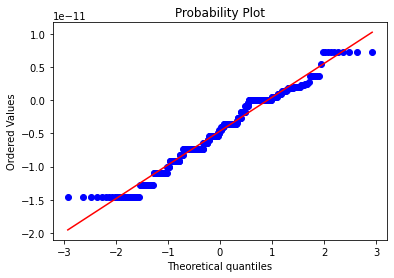

C:\Users\vish\anaconda3_64\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\vish\anaconda3_64\lib\site-packages\seaborn\distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)


<AxesSubplot:ylabel='Density'>

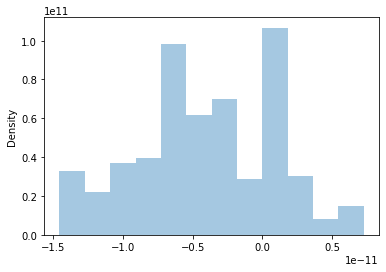

In [26]:
#Checking normal distribution of residuals
residual = y_test - y_pred
print("Skewness is ",residual.skew())
stats.probplot(residual,dist='norm',plot=plt)
plt.show()
sns.distplot(residual)